# Image Classification
![image.png](attachment:image.png)

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
#Change the working directory
import os
import gc
os.chdir('/content/gdrive/My Drive/Image Classification')
os.listdir()

['Dataset', 'Submission_Anupam_CNN.csv']

In [0]:
base_dir = '/content/gdrive/My Drive/Image Classification/'
#os.chdir(base_dir)
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

Importing dependencies
We use the following packages:

1. Matplotlib - to plot the training and validation accuracy/loss graphs. Matplotlib is extremely effective for visualize any aspect of the data.
2. tqdm - used for showing the progress in your loops
3. TensorFlow - a gradient-based deep learning library that works with Python and has the capability of using GPUs for computation
4. Keras - a deep learning library capable of running on top of TensorFlow.

In [0]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
% matplotlib inline
#import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow .keras.layers import InputLayer
from tensorflow.keras import backend as backend
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
from tqdm import tqdm, tqdm_notebook
import cv2

In [5]:
train_images_name = os.listdir('Dataset/Train Images/')
test_images_name = os.listdir('Dataset/Test Images/')
img_size = 224
batch_size = 16
no_of_train_batches = len(train_images_name) // batch_size + 1
no_of_test_batches = len(test_images_name) // batch_size + 1
train_lables = []
train_images_name

['cat.789.jpg',
 'cat.793.jpg',
 'cat.792.jpg',
 'cat.794.jpg',
 'cat.795.jpg',
 'cat.800.jpg',
 'cat.798.jpg',
 'cat.797.jpg',
 'cat.801.jpg',
 'cat.796.jpg',
 'cat.799.jpg',
 'cat.802.jpg',
 'cat.803.jpg',
 'cat.805.jpg',
 'cat.804.jpg',
 'cat.806.jpg',
 'cat.807.jpg',
 'cat.808.jpg',
 'cat.809.jpg',
 'cat.810.jpg',
 'cat.811.jpg',
 'cat.812.jpg',
 'cat.814.jpg',
 'cat.813.jpg',
 'cat.815.jpg',
 'cat.818.jpg',
 'cat.819.jpg',
 'cat.817.jpg',
 'cat.820.jpg',
 'cat.821.jpg',
 'cat.816.jpg',
 'cat.822.jpg',
 'cat.823.jpg',
 'cat.824.jpg',
 'cat.825.jpg',
 'cat.829.jpg',
 'cat.828.jpg',
 'cat.831.jpg',
 'cat.830.jpg',
 'cat.827.jpg',
 'cat.826.jpg',
 'cat.833.jpg',
 'cat.832.jpg',
 'cat.835.jpg',
 'cat.834.jpg',
 'cat.840.jpg',
 'cat.841.jpg',
 'cat.838.jpg',
 'cat.837.jpg',
 'cat.836.jpg',
 'cat.839.jpg',
 'cat.848.jpg',
 'cat.843.jpg',
 'cat.844.jpg',
 'cat.845.jpg',
 'cat.847.jpg',
 'cat.849.jpg',
 'cat.846.jpg',
 'cat.850.jpg',
 'cat.842.jpg',
 'cat.851.jpg',
 'cat.859.jpg',
 'cat.85

#### Read the images and resize them

In [0]:
# Read the images names from the directory and extracts the file names without extension
def load_images(path = base_dir, kind = 'train'):
    print('Loading ' + kind + ' Images' + ' Path = ' + path)
    training_images_name = path
    
    if(kind == 'train'):
        n_batches = no_of_train_batches
        image_names = train_images_name
    else:
        n_batches = no_of_test_batches
        image_names = test_images_name
    
    #Read the images in batch of 16 images
    all_images = np.zeros((len(image_names), img_size, img_size,3))
    
    for batch in tqdm_notebook(range(n_batches)):
        start = batch * batch_size
        end = (batch + 1) * batch_size
        batch_products = image_names[start:end]
        for i, product_id in enumerate(batch_products):
            try:
#                print('image =' + product_id)
                image = cv2.imread(path + product_id)
                image = cv2.resize(image, (img_size, img_size))
                all_images[batch * batch_size + i] = image
#                print('Read image =' + product_id)
                #Categorize the images based on file names
                if(kind == 'train'):
                    train_lables.append(product_id.split('.')[0])
            except:
                print('Exception ' + product_id)
                pass
    #Display any 1 image
    plt.imshow(all_images[1])
    return all_images


Loading train Images Path = /content/gdrive/My Drive/Image Classification/Dataset/Train Images/


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Loading test Images Path = /content/gdrive/My Drive/Image Classification/Dataset/Test Images/


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


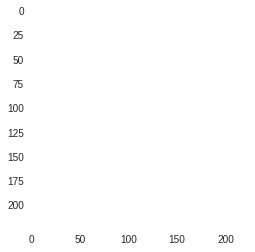

In [7]:
train_images = load_images(path = base_dir + 'Dataset/Train Images/', kind = 'train')
test_images = load_images(path = base_dir + 'Dataset/Test Images/', kind = 'test')

In [8]:
print(train_images_name[:10])
print(train_lables[:10])
print(train_images_name[1190:1210])
print(train_lables[1190:1210])

['cat.789.jpg', 'cat.793.jpg', 'cat.792.jpg', 'cat.794.jpg', 'cat.795.jpg', 'cat.800.jpg', 'cat.798.jpg', 'cat.797.jpg', 'cat.801.jpg', 'cat.796.jpg']
['cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat']
['cat.187.jpg', 'cat.188.jpg', 'cat.190.jpg', 'cat.191.jpg', 'cat.192.jpg', 'cat.195.jpg', 'cat.194.jpg', 'cat.196.jpg', 'cat.193.jpg', 'dog.108.jpg', 'dog.3.jpg', 'dog.2.jpg', 'dog.4.jpg', 'dog.1.jpg', 'dog.5.jpg', 'dog.8.jpg', 'dog.6.jpg', 'dog.9.jpg', 'dog.7.jpg', 'dog.11.jpg']
['cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog']


In [9]:
len(train_images_name)

2040

In [0]:
#Train Test Split
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
#train_lables = train_lables.replace({'cat': 0, 'dog': 1})
X_train, X_validate, y_train, y_validate = train_test_split(train_images, train_lables, test_size=0.33, random_state=3)


In [11]:
test_images.shape

(500, 224, 224, 3)

In [0]:
train_lables_one_hot = tf.keras.utils.to_categorical(pd.Series(y_train).replace({'cat': 0, 'dog': 1}), num_classes=2)
validate_lables_one_hot = tf.keras.utils.to_categorical(pd.Series(y_validate).replace({'cat': 0, 'dog': 1}), num_classes=2)


### Build the Deep Neural Network Model

In [0]:
#Define hyper parameters
training_epochs = 2
learning_rate = 0.03
batch_size = 64
dropout_rate = 0.5
momentum_rate = 0.9
decay_rate = 1e-5

#No of Nodes in hidden layer(hl)
n_nodes_hl1 = 128
n_nodes_hl2 = 50
n_nodes_hl3 = 50
n_nodes_hl4 = 20

#No of output classes for classification problems
n_classes = train_lables_one_hot.shape[1]


In [0]:
#Reset the graph
backend.clear_session()
tf.reset_default_graph()

In [15]:
#Build the model. Our graph is sequential
dnn_model = keras.Sequential()
#Add the input layer
dnn_model.add(tf.keras.layers.InputLayer(input_shape = (train_images.shape[1:4])))
dnn_model.add(tf.keras.layers.Flatten())
#Normalize the data
dnn_model.add(tf.keras.layers.BatchNormalization())

#Now add the hidden layers and Dropout layer(to avoid over fitting)
dnn_model.add(tf.keras.layers.Dense(units = n_nodes_hl1, kernel_initializer='glorot_uniform', bias_initializer='zeros', activation='relu', name = 'layer1'))
#keras.layers.Dropout(dropout_rate)
dnn_model.add(tf.keras.layers.Dense(units = n_nodes_hl2, kernel_initializer='glorot_uniform', bias_initializer='zeros', activation='relu', name = 'layer2'))
keras.layers.Dropout(dropout_rate)
dnn_model.add(tf.keras.layers.Dense(units = n_nodes_hl3, kernel_initializer='glorot_uniform', bias_initializer='zeros', activation='relu', name = 'layer3'))
#keras.layers.Dropout(dropout_rate)
dnn_model.add(tf.keras.layers.Dense(units = n_nodes_hl4, kernel_initializer='glorot_uniform', bias_initializer='zeros', activation='relu', name = 'layer4'))
keras.layers.Dropout(dropout_rate)
dnn_model.add(tf.keras.layers.Dense(units = n_classes, activation='sigmoid'))


Instructions for updating:
Colocations handled automatically by placer.


In [16]:
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
dnn_model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
dnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 150528)            0         
_________________________________________________________________
batch_normalization_v1 (Batc (None, 150528)            602112    
_________________________________________________________________
layer1 (Dense)               (None, 128)               19267712  
_________________________________________________________________
layer2 (Dense)               (None, 50)                6450      
_________________________________________________________________
layer3 (Dense)               (None, 50)                2550      
_________________________________________________________________
layer4 (Dense)               (None, 20)                1020      
_________________________________________________________________
dense (Dense)                (None, 2)                 42        
Total para

In [0]:
tensorboard = tf.keras.callbacks.TensorBoard(log_dir='/Dataset/dnn_v1')

In [18]:
train_images.shape, train_lables_one_hot.shape

((2040, 224, 224, 3), (1366, 2))

In [19]:
history = dnn_model.fit(x = X_train, y = train_lables_one_hot,  epochs = training_epochs, validation_data = (X_validate, validate_lables_one_hot),  verbose = 1, batch_size = batch_size)
print('Minimum Loss is: ', min(history.history['loss']))
print('Maximum Training Accuracy: ', max(history.history['acc']))
print('Maximum Test Accuracy: ', max(history.history['val_acc']))


Train on 1366 samples, validate on 674 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/2
1366/1366 [==============================] - 4s 3ms/sample - loss: 7.5048 - acc: 0.5088 - val_loss: 7.9676 - val_acc: 0.5030
Epoch 2/2
1366/1366 [==============================] - 3s 2ms/sample - loss: 7.7922 - acc: 0.5139 - val_loss: 7.9676 - val_acc: 0.5030
Minimum Loss is:  7.5047825272924555
Maximum Training Accuracy:  0.5139092
Maximum Test Accuracy:  0.50296736


### Build the CNN Model

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras import backend as backend

In [0]:
#Define hyper parameters
training_epochs = 25
learning_rate = 0.001
batch_size = 64
dropout_rate = 0.3
momentum_rate = 0.9
decay_rate = 1e-7

#No of Nodes in hidden layer(hl)
n_nodes_hl1 = 32
n_nodes_hl2 = 64
n_nodes_hl3 = 64
n_nodes_hl4 = 128
n_nodes_hl5 = 128

#No of output classes for classification problems
n_classes = train_lables_one_hot.shape[1]


In [0]:
#Reset the graph
backend.clear_session()
tf.reset_default_graph()


In [0]:
#Build the model. Our graph is sequential
cnn_model = tf.keras.models.Sequential()
#Add the input layer
cnn_model.add(tf.keras.layers.InputLayer(input_shape = (train_images.shape[1:4])))
#Normalize the data
cnn_model.add(tf.keras.layers.BatchNormalization())

#Add first convolutional layer with filter size 3X3
cnn_model.add(tf.keras.layers.Conv2D(n_nodes_hl1, kernel_size = (3,3), activation='relu'))
cnn_model.add(tf.keras.layers.Conv2D(n_nodes_hl1, kernel_size = (3,3), activation='relu'))
cnn_model.add(tf.keras.layers.Conv2D(n_nodes_hl1, kernel_size = (3,3), activation='relu'))
#Normalize the data
cnn_model.add(tf.keras.layers.BatchNormalization())
#Add MaxPooling layer
cnn_model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2)))
#Add the Drop Out layer
keras.layers.Dropout(dropout_rate)

#Add second convolutional layer with filter size 3X3
cnn_model.add(tf.keras.layers.Conv2D(n_nodes_hl2, kernel_size = (3,3), activation='relu'))
cnn_model.add(tf.keras.layers.Conv2D(n_nodes_hl2, kernel_size = (3,3), activation='relu'))
#Normalize the data
cnn_model.add(tf.keras.layers.BatchNormalization())
#Add MaxPooling layer
cnn_model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2)))
#Add the Drop Out layer
keras.layers.Dropout(dropout_rate)

#Add third convolutional layer with filter size 3X3
cnn_model.add(tf.keras.layers.Conv2D(n_nodes_hl3, kernel_size = (3,3), activation='relu'))
cnn_model.add(tf.keras.layers.Conv2D(n_nodes_hl3, kernel_size = (3,3), activation='relu'))
#Normalize the data
cnn_model.add(tf.keras.layers.BatchNormalization())
#Add MaxPooling layer
cnn_model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2)))
#Add dropout layer to avoid over fitting
keras.layers.Dropout(dropout_rate)

#Add fourth convolutional layer with filter size 3X3
cnn_model.add(tf.keras.layers.Conv2D(n_nodes_hl4, kernel_size = (3,3), activation='relu'))
cnn_model.add(tf.keras.layers.Conv2D(n_nodes_hl4, kernel_size = (3,3), activation='relu'))
#Normalize the data
cnn_model.add(tf.keras.layers.BatchNormalization())
#Add MaxPooling layer
cnn_model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2)))
#Add dropout layer to avoid over fitting
keras.layers.Dropout(dropout_rate)

#Flatten the output so that the o/p of Conv layer can be fed to dense layer
cnn_model.add(tf.keras.layers.Flatten())
#Dense layer
cnn_model.add(tf.keras.layers.Dense(n_nodes_hl5, activation = 'relu', name = 'dense1'))
#Output layer
cnn_model.add(tf.keras.layers.Dense(n_classes, activation = 'sigmoid', name = 'output'))


In [29]:
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
cnn_model.compile(optimizer =  optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_v1 (Batc (None, 224, 224, 3)       12        
_________________________________________________________________
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 32)      9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 218, 218, 32)      9248      
_________________________________________________________________
batch_normalization_v1_1 (Ba (None, 218, 218, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 109, 109, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 107, 107, 64)      18496     
__________

In [34]:
history = cnn_model.fit(x = X_train, y = train_lables_one_hot, validation_data = (X_validate, validate_lables_one_hot), epochs = training_epochs, verbose = 1, batch_size = batch_size)
print('Minimum Loss is: ', min(history.history['loss']))
print('Maximum Training Accuracy: ', max(history.history['acc']))
print('Maximum Test Accuracy: ', max(history.history['val_acc']))

Train on 1366 samples, validate on 674 samples
Epoch 1/25
1366/1366 [==============================] - 18s 13ms/sample - loss: 6.1452e-04 - acc: 1.0000 - val_loss: 1.1376 - val_acc: 0.6780
Epoch 2/25
1366/1366 [==============================] - 18s 13ms/sample - loss: 7.1762e-04 - acc: 1.0000 - val_loss: 1.1585 - val_acc: 0.6869
Epoch 3/25
1366/1366 [==============================] - 18s 13ms/sample - loss: 3.6887e-04 - acc: 1.0000 - val_loss: 1.1562 - val_acc: 0.6914
Epoch 4/25
1366/1366 [==============================] - 18s 13ms/sample - loss: 3.5831e-04 - acc: 1.0000 - val_loss: 1.1544 - val_acc: 0.6921
Epoch 5/25
1366/1366 [==============================] - 18s 13ms/sample - loss: 4.0833e-04 - acc: 1.0000 - val_loss: 1.1686 - val_acc: 0.6877
Epoch 6/25
1366/1366 [==============================] - 18s 13ms/sample - loss: 2.9187e-04 - acc: 1.0000 - val_loss: 1.1671 - val_acc: 0.6944
Epoch 7/25
1366/1366 [==============================] - 18s 13ms/sample - loss: 3.0463e-04 - acc: 1.0

In [0]:
y_test = cnn_model.predict(test_images)

In [32]:
y_test_pred = pd.DataFrame()
y_test_pred['File Name'] = test_images_name
y_test_pred['Prediction'] = list(np.argmax(y_test, axis = 1))
y_test_pred.Prediction = y_test_pred.Prediction.replace({0: 'cat', 1: 'dog'})
y_test_pred.head()

,File Name,Prediction
0,81.jpg,cat
1,2.jpg,dog
2,3.jpg,cat
3,4.jpg,dog
4,1.jpg,cat


In [0]:
# Output the Dataframe into a CSV file
y_test_pred[['File Name', 'Prediction']].to_csv(base_dir + 'Submission_Anupam_CNN.csv',  index = False)
